# KMT2D / Kabuki Syndrome 1 due to KMT2D deficiency 


[Kabuki 1 Syndrome - OMIM:147920](https://omim.org/entry/147920) is caused by heterozygous mutation in the **KMT2D**  gene (previously known as MLL2) ([OMIM:602113](https://omim.org/entry/602113)).
KABUK1 is characterized by typical facial abnormalities, cleft or high arched palate, skeletal abnormalities, 
short stature, intellectual disability, congenital heart defects, recurrent 
infections (otitis media, pneumonia) in 50% of patients. Autoimmunity may be present


#### **Published Genotype Phenotype Correlations**

##### KMT2D & KDM6A

- [Banka et al (2012)](https://pubmed.ncbi.nlm.nih.gov/22126750/): 
    - analyzed the KMT2D gene in a cohort of 116 patients with Kabuki syndrome, including 18 patients previously reported by Hannibal et al. (2011), and identified KMT2D variants in 74 (63.8%).
    - KABUK1 patients were more likely to have feeding problems, kidney anomalies, early breast bud development, joint dislocations, and palatal malformations in comparison with KMT2D mutation-negative patients
    - **Systematic Kabuki syndrome facial morphology study suggested that nearly all patients with typical Kabuki syndrome facial features have pathogenic KMT2D mutations, although the disorder can be phenotypically variable.**

- [Miyake et al (2013)](https://pubmed.ncbi.nlm.nih.gov/23913813/)
    - screened 81 patients with Kabuki syndrome for mutations in the MLL2 and KDM6A genes and identified MLL2 mutations in 50 (61.7%) and KDM6A mutations in 5 (6.2%)
    - Patients with **KMT2D truncating mutations (70%) had facies that were more typical of those seen in the patients originally reported with Kabuki syndrome.** High-arched eyebrows, short fifth fingers, and infantile hypotonia were more commonly seen in patients with MLL2 mutations than in those with KDM6A mutations.
    - **Only half of the patients with KMT2D mutations had short stature and postnatal growth retardation**, compared to all of the patients with KDM6A mutations.


In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.1


In [2]:
gene_symbol = 'KMT2D'
mane_tx_id = 'NM_003482.4'
mane_px_id = 'NP_003473.3' 

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.23') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize() 

Individuals Processed: 100%|██████████| 65/65 [00:00<00:00, 368.06individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #23
    individual
     warnings:
     ·`time_element` is in currently unsupported format `ontology_class`
     ·`time_element` is in currently unsupported format `ontology_class`


In [4]:
from gpsea.view import CohortViewer
viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
36,Depressed nasal tip
30,Prominent fingertip pads
30,Global developmental delay
25,Long palpebral fissure
24,Macrotia
22,Highly arched eyebrow
21,Intellectual disability
18,Eversion of lateral third of lower eyelids
17,Cleft palate
16,Hearing impairment


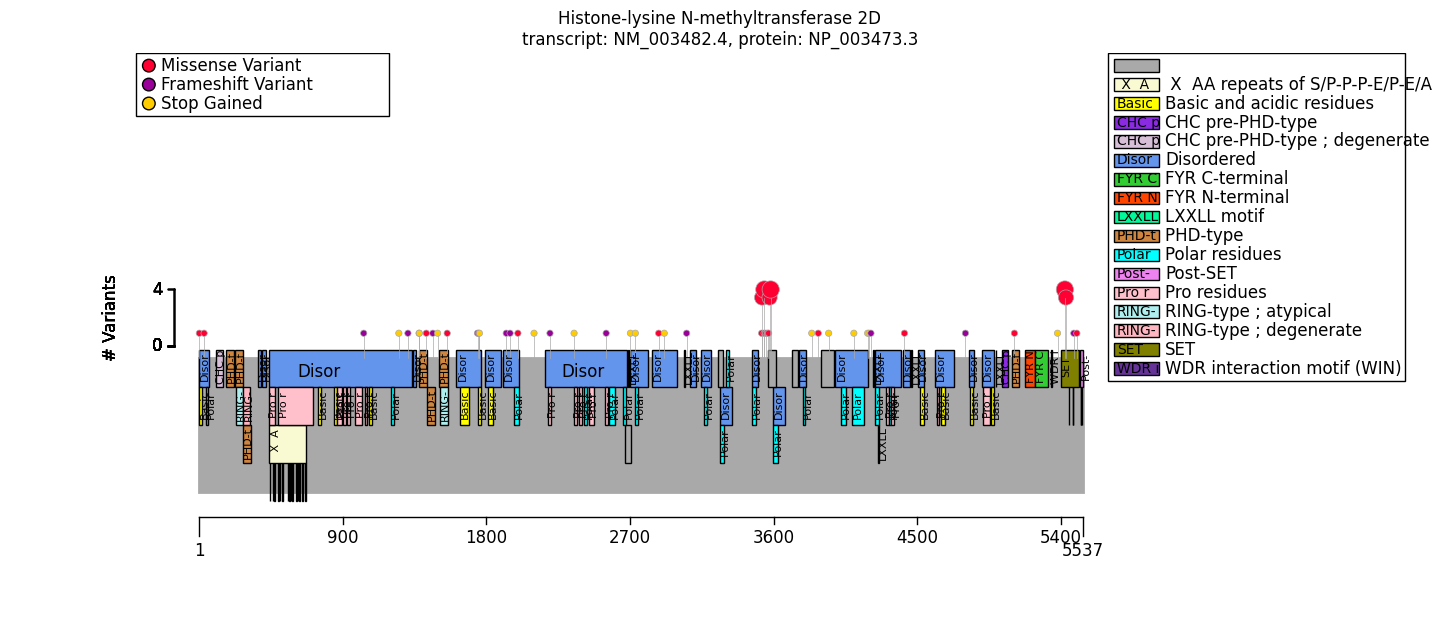

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_px_id)
kmt2d_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
kmt2d_fig.tight_layout()

In [6]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(mane_tx_id)
viewer.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
4,12_49034182_49034182_A_G,c.10625T>C (p.Leu3542Pro),39,missense
4,12_49022655_49022655_C_T,c.16273G>A (p.Glu5425Lys),52,missense
3,12_49033960_49033960_C_T,c.10745G>A (p.Arg3582Gln),40,missense
3,12_49034082_49034082_C_G,c.10725G>C (p.Gln3575His),39,missense
3,12_49034225_49034225_G_C,c.10582C>G (p.Leu3528Val),39,missense
2,12_49022634_49022634_G_A,c.16294C>T (p.Arg5432Trp),52,missense
1,12_49031446_49031446_C_T,c.13259G>A (p.Arg4420Gln),40,missense
1,12_49040117_49040119_GAC_G,c.7651_7652del (p.Val2551ProfsTer103),32,frameshift
1,12_49032074_49032075_GC_G,c.12630del (p.Gln4210HisfsTer5),40,frameshift
1,12_49022066_49022066_G_A,c.16498C>T (p.Arg5500Trp),54,missense


# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, mane_tx_id)
missense_clf = monoallelic_classifier(a_predicate=missense,
                                      b_predicate=~missense,
                                      a_label="missense",
                                      b_label="other")

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,42
HMF03,Skipping term because of a child term with the same individual counts,5
HMF08,Skipping general term,108
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,279


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense          other  \
                                                      Count Percent  Count   
Hearing impairment [HP:0000365]                       14/19     74%   8/21   
Highly arched eyebrow [HP:0002553]                      8/9     89%  14/21   
Recurrent otitis media [HP:0000403]                    8/15     53%   6/17   
Long palpebral fissure [HP:0000637]                     8/8    100%  17/21   
Depressed nasal tip [HP:0000437]                      16/20     80%  20/27   
Abnormal oral cavity morphology [HP:0000163]          16/16    100%  13/13   
Recurrent infections [HP:0002719]                     15/21     71%  15/20   
Unusual infection [HP:0032101]                        15/15    100%  15/15   
Abnormal nasal tip morphology [HP:0000436]            16/16    100%  20/20   
Abnormal external nose morphology [HP:0010938]        22/22    100%  21/21   
Abnormal nasal morphology [HP:0005105]                25/25    100%  25/25   
Prominent fingertip pads [HP:0001212]                 12/15     80%  18/23   
Prominent digit pad [HP:0011298]                      12/12    100%  18/18   
Regional abnormality of skin [HP:0011356]             12/12    100%  18/18   
Abnormal fingertip morphology [HP:0001211]            12/12    100%  18/18   
Abnormal finger morphology [HP:0001167]               15/15    100%  20/20   
Abnormal digit morphology [HP:0011297]                15/15    100%  21/21   
Abnormal appendicular skeleton morphology [HP:0...    15/15    100%  23/23   
Intellectual disability [HP:0001249]                  12/13     92%  13/14   
Neurodevelopmental abnormality [HP:0012759]           22/22    100%  22/22   
Global developmental delay [HP:0001263]               14/15     93%  16/17   
Neurodevelopmental delay [HP:0012758]                 21/21    100%  18/18   
Short stature [HP:0004322]                             9/13     69%  13/18   
Growth delay [HP:0001510]                             13/13    100%  16/16   
Abnormal hand morphology [HP:0005922]                 12/12    100%  18/18   
Abnormal pinna morphology [HP:0000377]                19/19    100%  22/22   
Abnormal eyelid morphology [HP:0000492]               12/12    100%  20/20   
Abnormal ocular adnexa morphology [HP:0030669]        13/13    100%  21/21   
Macrotia [HP:0000400]                                  8/10     80%  16/20   
Abnormal axial skeleton morphology [HP:0009121]       13/13    100%  15/15   
Abnormality of the palpebral fissures [HP:0008050]    11/11    100%  18/18   

Allele group                                                                   \
                                                   Percent Corrected p values   
Hearing impairment [HP:0000365]                        38%           0.956991   
Highly arched eyebrow [HP:0002553]                     67%           1.000000   
Recurrent otitis media [HP:0000403]                    35%           1.000000   
Long palpebral fissure [HP:0000637]                    81%           1.000000   
Depressed nasal tip [HP:0000437]                       74%           1.000000   
Abnormal oral cavity morphology [HP:0000163]          100%           1.000000   
Recurrent infections [HP:0002719]                      75%           1.000000   
Unusual infection [HP:0032101]                        100%           1.000000   
Abnormal nasal tip morphology [HP:0000436]            100%           1.000000   
Abnormal external nose morphology [HP:0010938]        100%           1.000000   
Abnormal nasal morphology [HP:0005105]                100%           1.000000   
Prominent fingertip pads [HP:0001212]                  78%           1.000000   
Prominent digit pad [HP:0011298]                      100%           1.000000   
Regional abnormality of skin [HP:0011356]             100%           1.000000   
Abnormal fingertip morphology [HP:0001211]            100%           1.000000   
Abnormal finger morphology [HP:0001167]         

### Correlation of Region 3300 - 3700


In [10]:
from gpsea.model.genome import Region
from gpsea.analysis.predicate import protein_region

nterm_region = Region(start=3300, end=3700)
is_n_term = protein_region(region=nterm_region, tx_id=mane_tx_id)

nterm_clf = monoallelic_classifier(a_predicate=is_n_term,
                                     b_predicate=~is_n_term,
                                     a_label="n_term",
                                     b_label="other")
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group                                       n_term          other  \
                                                    Count Percent  Count   
Hearing impairment [HP:0000365]                       8/8    100%  14/32   
Macrotia [HP:0000400]                                 0/2      0%  24/28   
Depressed nasal tip [HP:0000437]                      1/4     25%  35/43   
Recurrent otitis media [HP:0000403]                   0/3      0%  14/29   
Global developmental delay [HP:0001263]               4/5     80%  26/27   
Scoliosis [HP:0002650]                                2/4     50%   8/32   
Recurrent infections [HP:0002719]                     3/6     50%  27/35   
Short stature [HP:0004322]                            3/5     60%  19/26   
Abnormal oral cavity morphology [HP:0000163]          8/8    100%  21/21   
Unusual infection [HP:0032101]                        3/3    100%  27/27   
Abnormal nasal tip morphology [HP:0000436]            1/1    100%  35/35   
Abnormal external nose morphology [HP:0010938]        7/7    100%  36/36   
Abnormal nasal morphology [HP:0005105]                9/9    100%  41/41   
Prominent fingertip pads [HP:0001212]                 3/4     75%  27/34   
Prominent digit pad [HP:0011298]                      3/3    100%  27/27   
Regional abnormality of skin [HP:0011356]             3/3    100%  27/27   
Abnormal fingertip morphology [HP:0001211]            3/3    100%  27/27   
Abnormal finger morphology [HP:0001167]               4/4    100%  31/31   
Abnormal digit morphology [HP:0011297]                4/4    100%  32/32   
Abnormal appendicular skeleton morphology [HP:0...    4/4    100%  34/34   
Intellectual disability [HP:0001249]                  3/3    100%  22/24   
Neurodevelopmental abnormality [HP:0012759]         11/11    100%  33/33   
Neurodevelopmental delay [HP:0012758]               11/11    100%  28/28   
Growth delay [HP:0001510]                             5/5    100%  24/24   
Abnormal hand morphology [HP:0005922]                 1/1    100%  29/29   
Abnormal pinna morphology [HP:0000377]                3/3    100%  38/38   
Abnormal eyelid morphology [HP:0000492]               4/4    100%  28/28   
Abnormal ocular adnexa morphology [HP:0030669]        5/5    100%  29/29   
Abnormal axial skeleton morphology [HP:0009121]       4/4    100%  24/24   
Abnormality of the palpebral fissures [HP:0008050]    3/3    100%  26/26   
Highly arched eyebrow [HP:0002553]                    1/1    100%  21/29   

Allele group                                                                   \
                                                   Percent Corrected p values   
Hearing impairment [HP:0000365]                        44%           0.146537   
Macrotia [HP:0000400]                                  86%           0.363244   
Depressed nasal tip [HP:0000437]                       81%           0.363244   
Recurrent otitis media [HP:0000403]                    48%           1.000000   
Global developmental delay [HP:0001263]                96%           1.000000   
Scoliosis [HP:0002650]                                 25%           1.000000   
Recurrent infections [HP:0002719]                      77%           1.000000   
Short stature [HP:0004322]                             73%           1.000000   
Abnormal oral cavity morphology [HP:0000163]          100%           1.000000   
Unusual infection [HP:0032101]                        100%           1.000000   
Abnormal nasal tip morphology [HP:0000436]            100%           1.000000   
Abnormal external nose morphology [HP:0010938]        100%           1.000000   
Abnormal nasal morphology [HP:0005105]                100%           1.000000   
Prominent fingertip pads [HP:0001212]                  79%           1.000000   
Prominent digit pad [HP:0011298]                      100%           1.000000   
Regional abnormality of skin [HP:0011356]             100%           1.000000   
Abnormal fingertip morphology [HP

### Correlation Female vs Male

In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Macrotia [HP:0000400]                               11/17     65%  13/13   
Highly arched eyebrow [HP:0002553]                  10/16     62%  12/14   
Prominent fingertip pads [HP:0001212]               17/23     74%  13/15   
Recurrent infections [HP:0002719]                   16/20     80%  14/21   
Depressed nasal tip [HP:0000437]                    21/26     81%  15/21   
Global developmental delay [HP:0001263]             18/20     90%  12/12   
Recurrent otitis media [HP:0000403]                  8/16     50%   6/16   
Hearing impairment [HP:0000365]                     14/27     52%   8/13   
Abnormal oral cavity morphology [HP:0000163]        19/19    100%  10/10   
Unusual infection [HP:0032101]                      16/16    100%  14/14   
Abnormal nasal tip morphology [HP:0000436]          21/21    100%  15/15   
Abnormal external nose morphology [HP:0010938]      25/25    100%  18/18   
Abnormal nasal morphology [HP:0005105]              31/31    100%  19/19   
Prominent digit pad [HP:0011298]                    17/17    100%  13/13   
Regional abnormality of skin [HP:0011356]           17/17    100%  13/13   
Abnormal fingertip morphology [HP:0001211]          17/17    100%  13/13   
Abnormal finger morphology [HP:0001167]             21/21    100%  14/14   
Abnormal digit morphology [HP:0011297]              22/22    100%  14/14   
Abnormal appendicular skeleton morphology [HP:0...  23/23    100%  15/15   
Intellectual disability [HP:0001249]                12/13     92%  13/14   
Neurodevelopmental abnormality [HP:0012759]         24/24    100%  20/20   
Neurodevelopmental delay [HP:0012758]               22/22    100%  17/17   
Short stature [HP:0004322]                          15/21     71%   7/10   
Growth delay [HP:0001510]                           17/17    100%  12/12   
Abnormal hand morphology [HP:0005922]               18/18    100%  12/12   
Abnormal pinna morphology [HP:0000377]              21/21    100%  20/20   
Abnormal eyelid morphology [HP:0000492]             17/17    100%  15/15   
Abnormal ocular adnexa morphology [HP:0030669]      18/18    100%  16/16   
Abnormal axial skeleton morphology [HP:0009121]     15/15    100%  13/13   
Long palpebral fissure [HP:0000637]                 13/15     87%  12/14   
Abnormality of the palpebral fissures [HP:0008050]  16/16    100%  13/13   

Sex                                                                            \
                                                   Percent Corrected p values   
Macrotia [HP:0000400]                                 100%            0.73572   
Highly arched eyebrow [HP:0002553]                     86%            1.00000   
Prominent fingertip pads [HP:0001212]                  87%            1.00000   
Recurrent infections [HP:0002719]                      67%            1.00000   
Depressed nasal tip [HP:0000437]                       71%            1.00000   
Global developmental delay [HP:0001263]               100%            1.00000   
Recurrent otitis media [HP:0000403]                    38%            1.00000   
Hearing impairment [HP:0000365]                        62%            1.00000   
Abnormal oral cavity morphology [HP:0000163]          100%            1.00000   
Unusual infection [HP:0032101]                        100%            1.00000   
Abnormal nasal tip morphology [HP:0000436]            100%            1.00000   
Abnormal external nose morphology [HP:0010938]        100%            1.00000   
Abnormal nasal morphology [HP:0005105]                100%            1.00000   
Prominent digit pad [HP:0011298]                      100%            1.00000   
Regional abnormality of skin [HP:0011356]             100%            1.00000   
Abnormal fingertip morphology [HP:0001211]            100%            1.00000   
Abnormal finger morphology [HP:00

### Correlation specific Variant 

In [12]:
from gpsea.analysis.predicate import variant_key
l3542p = variant_key("12_49034182_49034182_A_G") #	c.10625T>C (p.Leu3542Pro)

l3542p_clf = monoallelic_classifier(
    a_predicate=l3542p,
    b_predicate= ~l3542p,
    a_label='p.Leu3542Pro',
    b_label='Other variant')

l354p_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=l3542p_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=l354p_result)

Allele group                                p.Leu3542Pro          \
                                                   Count Percent   
Recurrent otitis media [HP:0000403]                  0/1      0%   
Recurrent infections [HP:0002719]                    2/3     67%   
Unusual infection [HP:0032101]                       2/2    100%   
Neurodevelopmental abnormality [HP:0012759]          1/1    100%   
Neurodevelopmental delay [HP:0012758]                1/1    100%   

Allele group                                Other variant          \
                                                    Count Percent   
Recurrent otitis media [HP:0000403]                 14/31     45%   
Recurrent infections [HP:0002719]                   28/38     74%   
Unusual infection [HP:0032101]                      28/28    100%   
Neurodevelopmental abnormality [HP:0012759]         43/43    100%   
Neurodevelopmental delay [HP:0012758]               38/38    100%   

Allele group                                                             
                                            Corrected p values p values  
Recurrent otitis media [HP:0000403]                        1.0      1.0  
Recurrent infections [HP:0002719]                          1.0      1.0  
Unusual infection [HP:0032101]                             1.0      1.0  
Neurodevelopmental abnormality [HP:0012759]                1.0      1.0  
Neurodevelopmental delay [HP:0012758]                      1.0      1.0

### Correlation for specific variant: 12_49022655_49022655_C_T

In [13]:
q5425k = variant_key("12_49022655_49022655_C_T") # c.16273G>A (p.Glu5425Lys)

q5425k_clf = monoallelic_classifier(
    a_predicate=q5425k,
    b_predicate= ~q5425k,
    a_label='p.Glu5425Lys',
    b_label="other"
)

q5425k_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=q5425k_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=q5425k_result)

Allele group                                       p.Glu5425Lys          \
                                                          Count Percent   
Recurrent otitis media [HP:0000403]                         4/4    100%   
Short stature [HP:0004322]                                  4/4    100%   
Scoliosis [HP:0002650]                                      2/4     50%   
Recurrent infections [HP:0002719]                           4/4    100%   
Prominent fingertip pads [HP:0001212]                       4/4    100%   
Hearing impairment [HP:0000365]                             3/4     75%   
Abnormal oral cavity morphology [HP:0000163]                4/4    100%   
Unusual infection [HP:0032101]                              4/4    100%   
Depressed nasal tip [HP:0000437]                            3/4     75%   
Abnormal nasal tip morphology [HP:0000436]                  3/3    100%   
Abnormal external nose morphology [HP:0010938]              3/3    100%   
Abnormal nasal morphology [HP:0005105]                      3/3    100%   
Prominent digit pad [HP:0011298]                            4/4    100%   
Regional abnormality of skin [HP:0011356]                   4/4    100%   
Abnormal fingertip morphology [HP:0001211]                  4/4    100%   
Abnormal finger morphology [HP:0001167]                     4/4    100%   
Abnormal digit morphology [HP:0011297]                      4/4    100%   
Abnormal appendicular skeleton morphology [HP:0...          4/4    100%   
Intellectual disability [HP:0001249]                        4/4    100%   
Neurodevelopmental abnormality [HP:0012759]                 4/4    100%   
Global developmental delay [HP:0001263]                     4/4    100%   
Neurodevelopmental delay [HP:0012758]                       4/4    100%   
Growth delay [HP:0001510]                                   4/4    100%   
Abnormal hand morphology [HP:0005922]                       4/4    100%   
Abnormal pinna morphology [HP:0000377]                      4/4    100%   
Abnormal axial skeleton morphology [HP:0009121]             2/2    100%   

Allele group                                        other          \
                                                    Count Percent   
Recurrent otitis media [HP:0000403]                 10/28     36%   
Short stature [HP:0004322]                          18/27     67%   
Scoliosis [HP:0002650]                               8/32     25%   
Recurrent infections [HP:0002719]                   26/37     70%   
Prominent fingertip pads [HP:0001212]               26/34     76%   
Hearing impairment [HP:0000365]                     19/36     53%   
Abnormal oral cavity morphology [HP:0000163]        25/25    100%   
Unusual infection [HP:0032101]                      26/26    100%   
Depressed nasal tip [HP:0000437]                    33/43     77%   
Abnormal nasal tip morphology [HP:0000436]          33/33    100%   
Abnormal external nose morphology [HP:0010938]      40/40    100%   
Abnormal nasal morphology [HP:0005105]              47/47    100%   
Prominent digit pad [HP:0011298]                    26/26    100%   
Regional abnormality of skin [HP:0011356]           26/26    100%   
Abnormal fingertip morphology [HP:0001211]          26/26    100%   
Abnormal finger morphology [HP:0001167]             31/31    100%   
Abnormal digit morphology [HP:0011297]              32/32    100%   
Abnormal appendicular skeleton morphology [HP:0...  34/34    100%   
Intellectual disability [HP:0001249]                21/23     91%   
Neurodevelopmental abnormality [HP:0012759]         40/40    100%   
Global developmental delay [HP:0001263]             26/28     93%   
Neurodevelopmental delay [HP:0012758]               35/35    100%   
Growth delay [HP:0001510]                           25/25    100%   
Abnormal hand morphology [HP:0005922]               26/26    100%   
Abnormal pinna morphology [HP:0000377]              37/37    100%   
Abnormal axial skeleton morphology [

### Summary

- **M vs F**: no significant correlations found
- **Mutation Types**: no significant correlation found, only a tendency for Missense vs other variants, just a tendency for various features
- **Region Correlation** region 3300-3700 here we actually found a significant correltation for sensorineural hearing impairment [HP:0000407]: corr.p.value: 0.0002 , and a tendency for hearing impairment [HP:0000365]: corr.p.value 0.066
- **specific Variants**: no significant correlation found for the two most frequent variants (12_49022655_49022655_C_T and 12_49034182_49034182_A_G)

In [14]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
  GPAnalysisResultSummary.from_multi( result=mf_result,  ),
  GPAnalysisResultSummary.from_multi( result=missense_result,  ),
  GPAnalysisResultSummary.from_multi( result=nterm_result,  ),
  GPAnalysisResultSummary.from_multi( result=q5425k_result,  ),
  GPAnalysisResultSummary.from_multi( result=l354p_result,  ),
)


caption = """."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_px_id,
                             caption=caption)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,31,0
Genotype (A),Genotype (B),Tests performed,Significant tests
missense,other,31,0
Genotype (A),Genotype (B),Tests performed,Significant tests
n_term,other,31,0
Genotype (A),Genotype (B),Tests performed,Significant tests
p.Glu5425Lys,other,26,0
Genotype (A),Genotype (B),Tests performed,Significant tests
p.Leu3542Pro,Other variant,5,0


In [16]:
summarizer.process_latex(report=report, protein_fig=kmt2d_fig)

Figure saved to ../../supplement/img/KMT2D_protein_diagram-draft.pdf
Output to ../../supplement/tex/KMT2D_summary_draft.tex
